<a href="https://colab.research.google.com/github/samarthya04/IIIT-A-internship/blob/main/Online_Retail_Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/IIIT-A Internship/OnlineRetail.csv', encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [15]:
df = df[['InvoiceNo','StockCode','Quantity','UnitPrice','InvoiceDate','CustomerID' ]]
df

,InvoiceNo,StockCode,Quantity,UnitPrice,InvoiceDate,CustomerID
0,536365,85123A,6,2.55,01-12-2010 08:26,17850.0
1,536365,71053,6,3.39,01-12-2010 08:26,17850.0
2,536365,84406B,8,2.75,01-12-2010 08:26,17850.0
3,536365,84029G,6,3.39,01-12-2010 08:26,17850.0
4,536365,84029E,6,3.39,01-12-2010 08:26,17850.0
...,...,...,...,...,...,...
541904,581587,22613,12,0.85,09-12-2011 12:50,12680.0
541905,581587,22899,6,2.10,09-12-2011 12:50,12680.0
541906,581587,23254,4,4.15,09-12-2011 12:50,12680.0
541907,581587,23255,4,4.15,09-12-2011 12:50,12680.0


In [16]:
df['Amount'] = df.values[:, 2] * df.values[:, 3]
df.drop(['Quantity', 'UnitPrice'],axis=1, inplace=True)
df

<ipython-input-16-1c32b62979e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df.values[:, 2] * df.values[:, 3]
<ipython-input-16-1c32b62979e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Quantity', 'UnitPrice'],axis=1, inplace=True)


,InvoiceNo,StockCode,InvoiceDate,CustomerID,Amount
0,536365,85123A,01-12-2010 08:26,17850.0,15.3
1,536365,71053,01-12-2010 08:26,17850.0,20.34
2,536365,84406B,01-12-2010 08:26,17850.0,22.0
3,536365,84029G,01-12-2010 08:26,17850.0,20.34
4,536365,84029E,01-12-2010 08:26,17850.0,20.34
...,...,...,...,...,...
541904,581587,22613,09-12-2011 12:50,12680.0,10.2
541905,581587,22899,09-12-2011 12:50,12680.0,12.6
541906,581587,23254,09-12-2011 12:50,12680.0,16.6
541907,581587,23255,09-12-2011 12:50,12680.0,16.6


In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed')
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

df.drop(['InvoiceDate'],axis=1, inplace=True)
df

<ipython-input-18-0f022c43b2c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed')
<ipython-input-18-0f022c43b2c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['InvoiceDate'].dt.date
<ipython-input-18-0f022c43b2c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,InvoiceNo,StockCode,CustomerID,Amount,Date,Time
0,536365,85123A,17850.0,15.3,2010-01-12,08:26:00
1,536365,71053,17850.0,20.34,2010-01-12,08:26:00
2,536365,84406B,17850.0,22.0,2010-01-12,08:26:00
3,536365,84029G,17850.0,20.34,2010-01-12,08:26:00
4,536365,84029E,17850.0,20.34,2010-01-12,08:26:00
...,...,...,...,...,...,...
541904,581587,22613,12680.0,10.2,2011-09-12,12:50:00
541905,581587,22899,12680.0,12.6,2011-09-12,12:50:00
541906,581587,23254,12680.0,16.6,2011-09-12,12:50:00
541907,581587,23255,12680.0,16.6,2011-09-12,12:50:00


In [ ]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

#deleting null data
df = df[df['CustomerID'].notnull()]

In [ ]:
df = df[df['Country']=='United Kingdom']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,09-12-2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,09-12-2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,09-12-2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,09-12-2011 12:49,8.95,13113.0,United Kingdom


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['InvoiceNo','Quantity','UnitPrice']] = scaler.fit_transform(df[['InvoiceNo','Quantity','UnitPrice']])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,-1.845830,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.031774,01-12-2010 08:26,-0.023177,17850.0,United Kingdom
1,-1.845830,71053,WHITE METAL LANTERN,-0.031774,01-12-2010 08:26,0.023849,17850.0,United Kingdom
2,-1.845830,84406B,CREAM CUPID HEARTS COAT HANGER,-0.021207,01-12-2010 08:26,-0.011980,17850.0,United Kingdom
3,-1.845830,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.031774,01-12-2010 08:26,0.023849,17850.0,United Kingdom
4,-1.845830,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.031774,01-12-2010 08:26,0.023849,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,1.588022,22466,FAIRY TALE COTTAGE NIGHT LIGHT,-0.000073,09-12-2011 12:31,-0.056766,15804.0,United Kingdom
541890,1.588098,22061,LARGE CAKE STAND HANGING STRAWBERY,-0.021207,09-12-2011 12:49,-0.000783,13113.0,United Kingdom
541891,1.588098,23275,SET OF 3 HANGING OWLS OLLIE BEAK,0.063329,09-12-2011 12:49,-0.095954,13113.0,United Kingdom
541892,1.588098,21217,RED RETROSPOT ROUND CAKE TINS,0.063329,09-12-2011 12:49,0.335113,13113.0,United Kingdom


In [ ]:
def optimise_k_means(data, max_k):
    means = []
    inertias=[]

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #Elbow plot
    plt.subplot()
    plt.plot(means, inertias, 'o-')
    plt.grid(True)
    plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_k

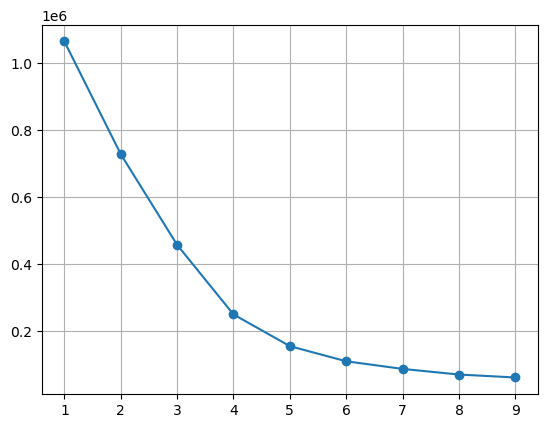

In [ ]:
optimise_k_means(df[['InvoiceNo','Quantity','UnitPrice']], 10)

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(df[['InvoiceNo','Quantity','UnitPrice']])

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
df['Kmeans_3'] = kmeans.labels_

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Kmeans_3
0,-1.845830,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.031774,01-12-2010 08:26,-0.023177,17850.0,United Kingdom,1
1,-1.845830,71053,WHITE METAL LANTERN,-0.031774,01-12-2010 08:26,0.023849,17850.0,United Kingdom,1
2,-1.845830,84406B,CREAM CUPID HEARTS COAT HANGER,-0.021207,01-12-2010 08:26,-0.011980,17850.0,United Kingdom,1
3,-1.845830,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.031774,01-12-2010 08:26,0.023849,17850.0,United Kingdom,1
4,-1.845830,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.031774,01-12-2010 08:26,0.023849,17850.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
541889,1.588022,22466,FAIRY TALE COTTAGE NIGHT LIGHT,-0.000073,09-12-2011 12:31,-0.056766,15804.0,United Kingdom,0
541890,1.588098,22061,LARGE CAKE STAND HANGING STRAWBERY,-0.021207,09-12-2011 12:49,-0.000783,13113.0,United Kingdom,0
541891,1.588098,23275,SET OF 3 HANGING OWLS OLLIE BEAK,0.063329,09-12-2011 12:49,-0.095954,13113.0,United Kingdom,0
541892,1.588098,21217,RED RETROSPOT ROUND CAKE TINS,0.063329,09-12-2011 12:49,0.335113,13113.0,United Kingdom,0


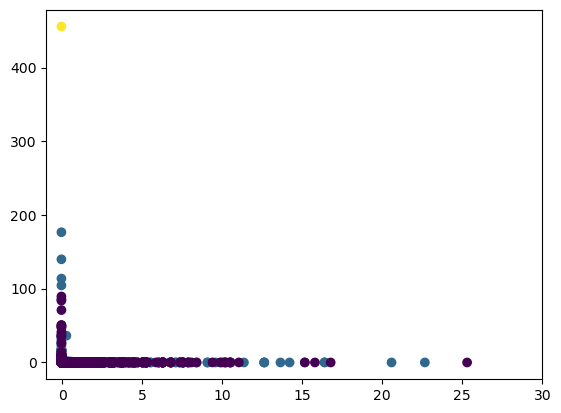

In [ ]:
plt.scatter(x=df['Quantity'], y=df[['UnitPrice']], c=df['Kmeans_3'])
plt.xlim(-1, 30)
# plt.ylim(3, 1.5)
plt.show()